## Filtros Resposta Finita ao Impulso

Vamos denominar Finite Response Impulse Reponse (FIR), que são caracterizados pelas equações:
$$ y(n) = \sum_{k=0}^{N-1}h(k)x(n-k)$$
$$ H(z) = \sum_{k=0}^{N-1}h(k)z^{-k}$$
sendo $h(k)$, $k = 0, 1, ..., N-1$ a reposta ao impulso do filtro, $H(z)$ sua função de transferência.

1. A saída atual depende somente das entradas anteriores;
2. Filtros FIR sempre são estáveis;
3. Deseja que os filtro tenham fase linear;


Vamos considerar que temos  a quantidade de carros por minuto que passar por um cruzamento em um determinado local.


| Minuto |  1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 
|------|------|------|------|------|------|------|------|------|------|------|
| Carros/Min  | 10 | 22 | 24 |  42 | 37 | 77 | 89 | 22 | 63 | 9 |
|Média (5 min) | - | - | - | - | 27 | 40,4 | 53,8 | 53,4 | 57,6 | 52 |

Veja que a média é dada por
$$y(n) = \frac{1}{5}[x(n) + x(n-1) + x(n-2) + x(n - 3) + x(n-4)] = \frac{1}{5}\sum_{k=0}^{4}x(n - k)$$
e podemos representar pela estrutura abaixo.

![title](img/FIRmedia5pontos.png)

Observe que temos um filto FIR, com $h(k) = 1/5$, $k = 0, 1, 2, 3, 4$.


Projetar um filtro consiste em determinar os valores de $h(n)$, $n = 0, 1, ..., N-1$ para que $H(k)$, $k = 0, 1, 2, ..., N-1$ tenha uma formato desejado. Deve-se levar em contato que é possível escolher um dos tipos de filtros (I, II, III ou IV) para que $H(k)$ tenha fase linear.

Podemos escrever $$ H(z) = \sum_{k=0}^{N-1}h(k)z^{-k}$$ como $$ H(z) = \frac{h(0)z^{N-1} + h(1)z^{N-2} + ... + h(N-1)}{z^{N-1}}$$ o que mostra que existem $N-1$ polos, todos localizados na origem, e portanto os filtro FIR são inerentemente estáveis, visto que estão dentro do círculo unitário.


### <font color='blue'> Projeto de Filtros FIR por Amostragem em Frequência </color>


Dada a especificação no domínio da frequência de um filtro $H(e^{j\omega})$ pode-se retirar amostras nas frequências $\frac{2\pi k}{N}$, $k = 0, 1, 2, ..., N-1$ obtendo a sequência $H(k)$ e em seguida aplicar a transformada inversa para obter os coeficientes do filtro $h(n)$. 

Como representado na figura abaixo, partiindo da resposta em frequência de um filtro passa-baixas (a), retira-se as amostras (b) e o filtro obtido terá resposta exata nos pontos de amostragem, mas aproximada no demais pontos, como representado na figura (c) $\hat{H}(e^{j\omega})$.

![title](img/aproximacaoFIR.png)

Ao aplicar a transformada inversa, considerando os filtro passa-baixas do exemplo anterior e considerando $N$ par obtemos
$$
h(n) = \frac{1}{N}\left[2\sum_{k=1}^{N/2-1}(-1)^k|H(k)|\cos[2\pi k(n-\alpha)/N] + H(0)\right]
$$
sendo $\alpha = (N-1)/2$. Caso $N$ seja ímpar o somatório se torna $(N-1)/2$.

Na lista abaixo temos os tipos de filtros:

1. Tipo I: $$
h(n) = \frac{1}{N}\left[2\sum_{k=1}^{N/2-1}(-1)^k|H(k)|\cos[2\pi k(n-\alpha)/N] + H(0)\right]
$$
2. Tipo II: $$
h(n) = \frac{1}{N}\left[2\sum_{k=1}^{\frac{N-1}{2}}(-1)^k|H(k)|\cos[2\pi k(n-\alpha)/N] + H(0)\right],
\ \ |H(\frac{N}{2})| = 0$$
3. Tipo III: $$
h(n) = \frac{2}{N}\left[\sum_{k=1}^{N/2-1}2|H(k)|\sin[\pi k(1 + 2)/N]\right], \ \ |H(0)| = 0$$
4. Tipo IV: $$
h(n) = \frac{1}{N}\left[(-1)^{\frac{N}{2}}H(\frac{N}{2}) + 2\sum_{k=1}^{N/2-1}(-1)^k|H(k)|\sin[\pi k(1 + 2n)/N]\right], \ \ |H(0)| = 0$$

**Exemplo:** Considere um filtro passa-baixas com banda passante de 0 a 5kHz, frequência de amsotragem de $18 kHz$ e e $N = 9$.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


[ 0.07252263 -0.11111111 -0.05912099  0.31993169  0.55555556  0.31993169
 -0.05912099 -0.11111111  0.07252263]


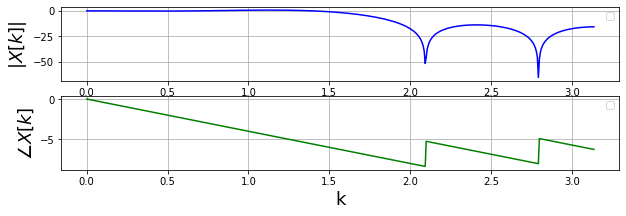

In [12]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy import signal

N = 9

absH = [1, 1, 1, 0, 0, 0, 0, 1, 1]
alpha = (N-1)/2

h = np.zeros(N)

for n in range (0,N):
    arg = 0
    f = int((N -1)/2)
    for k in range(1,f):
        arg = arg + 2*absH[k]*np.cos((2*np.pi*k*(n-alpha))/N)
    h[n] = (1/N)*(arg + absH[0])

Hk = abs(scp.fft(h))

print(h)

w, h = signal.freqz(h)

fig,ax=plt.subplots(2)
fig.set_size_inches((10,3))

ax[0].plot(w, 20 * np.log10(abs(h)), 'b')
ax[0].set_xlabel('k',fontsize=18)
ax[0].set_ylabel(r'$|X[k]|$',fontsize=18)
#ax[0].set_title('DFT Sinal Janelado',fontsize=18)
ax[0].grid()
ax[0].legend(loc=0);

ax[1].plot(w, angles, 'g')
ax[1].set_xlabel('k',fontsize=18)
ax[1].set_ylabel(r'$\angle X[k]$',fontsize=18)
#ax[1].set_title('DFT Sinal Janelado',fontsize=18)
ax[1].grid()
ax[1].legend(loc=0);

#plt.plot(w, 20 * np.log10(abs(h)), 'b')
#angles = np.unwrap(np.angle(h))
#plt.plot(w, angles, 'g')
#plt.grid()
#plt.show()